In [1]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#5D7599",
    "#233142",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["\\\\", "", ""]

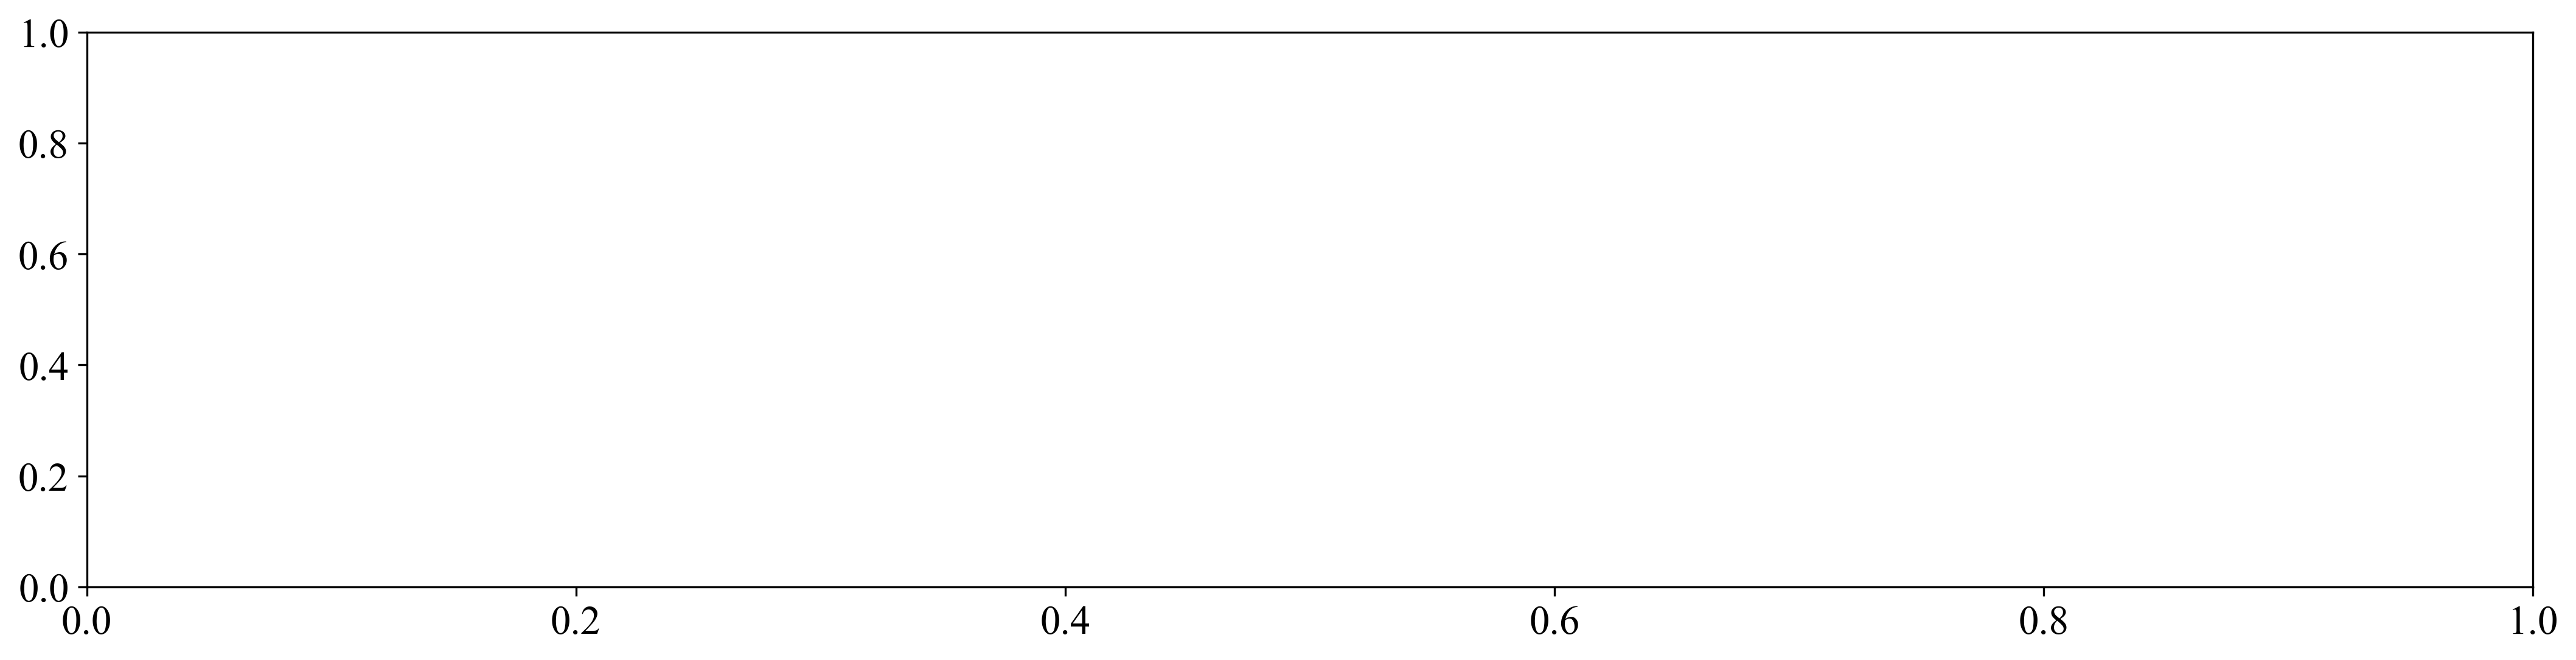

In [2]:
fig, ax = plt.subplots(
    figsize=(14, 14 / 4), ncols=1, nrows=1, constrained_layout=True, dpi=300
)

In [3]:
labels_name_a = [
    "ModelA\n8DP",
    "ModelA\n8TP",
    "ModelB\n8TP",  
    "ModelA\n2DP$\\times$4TP",
    "ModelA\n2DP$\\times$8TP",
    "ModelA\n4DP$\\times$2TP",
    "ModelB\n4DP$\\times$2TP",
]

In [4]:
# peak memory
data_a = {
    labels_name_a[0]: [79, 40.95, 50.12],  # modela 8DP
    labels_name_a[1]: [47, 44.24, 41.74],  # modela 8TP
    labels_name_a[2]: [65.66, 59.47, 69.75],  # modelb 8TP
    labels_name_a[3]: [50, 40.94, 54.22],  # modela 2DP 4TP
    labels_name_a[4]: [64.75, 56.42, 0],  # modela 2DP 8TP
    labels_name_a[5]: [60, 40.97, 55.75],  # modela 4DP 2TP
    labels_name_a[6]: [-1, 59.32, 64.60],  # modelb 4DP 2TP
}

In [5]:
legend_labels = ["Megatron-LM", "XLA", "DLRover-Lynx"]

In [6]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

x_label_cnt = len(data_a.keys())
x_label_group_cnt = 3

for idx in range(x_label_cnt):
    group_positions[idx] = []
    for _ in range(x_label_group_cnt):
        group_positions[idx].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for idx, positions in group_positions.items():
    group_centers[idx] = sum(positions) / len(positions)

In [7]:
label_set = set()
for idx, (x_label, y_data) in enumerate(data_a.items()):
    positions = group_positions[idx]
    for i, (pos, value, color, edgecolor, hatch, label) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
            legend_labels,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)
        if value == -1:
            ax.text(
                pos,
                1,
                "$\\times$OOM",
                rotation=90,
                ha="center",
                va="bottom",
                color="red",
            )
        ax.bar(
            pos,
            value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

ax.set_xticks(list(group_centers.values()))
ax.set_xticklabels(list(data_a.keys()))

ax.set_ylim(0, 85)
ax.set_yticks([0, 40, 80])
ax.set_yticklabels(["0", "40", "80"], rotation=90, ha="center", va="center")

ax.tick_params(axis="x", bottom=False, labelsize=g_label_fontsize, pad=1)
ax.tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax.set_ylabel("Peak Memory (GB)", fontsize=g_label_fontsize)

Text(13.333333333333346, 0.5, 'Peak Memory (GB)')

In [ ]:
fig.legend(
    ncol=3,
    loc="upper center",
    frameon=False,
    shadow=False,
    bbox_to_anchor=(0.5, 1.1),
    fontsize=g_label_fontsize,
)

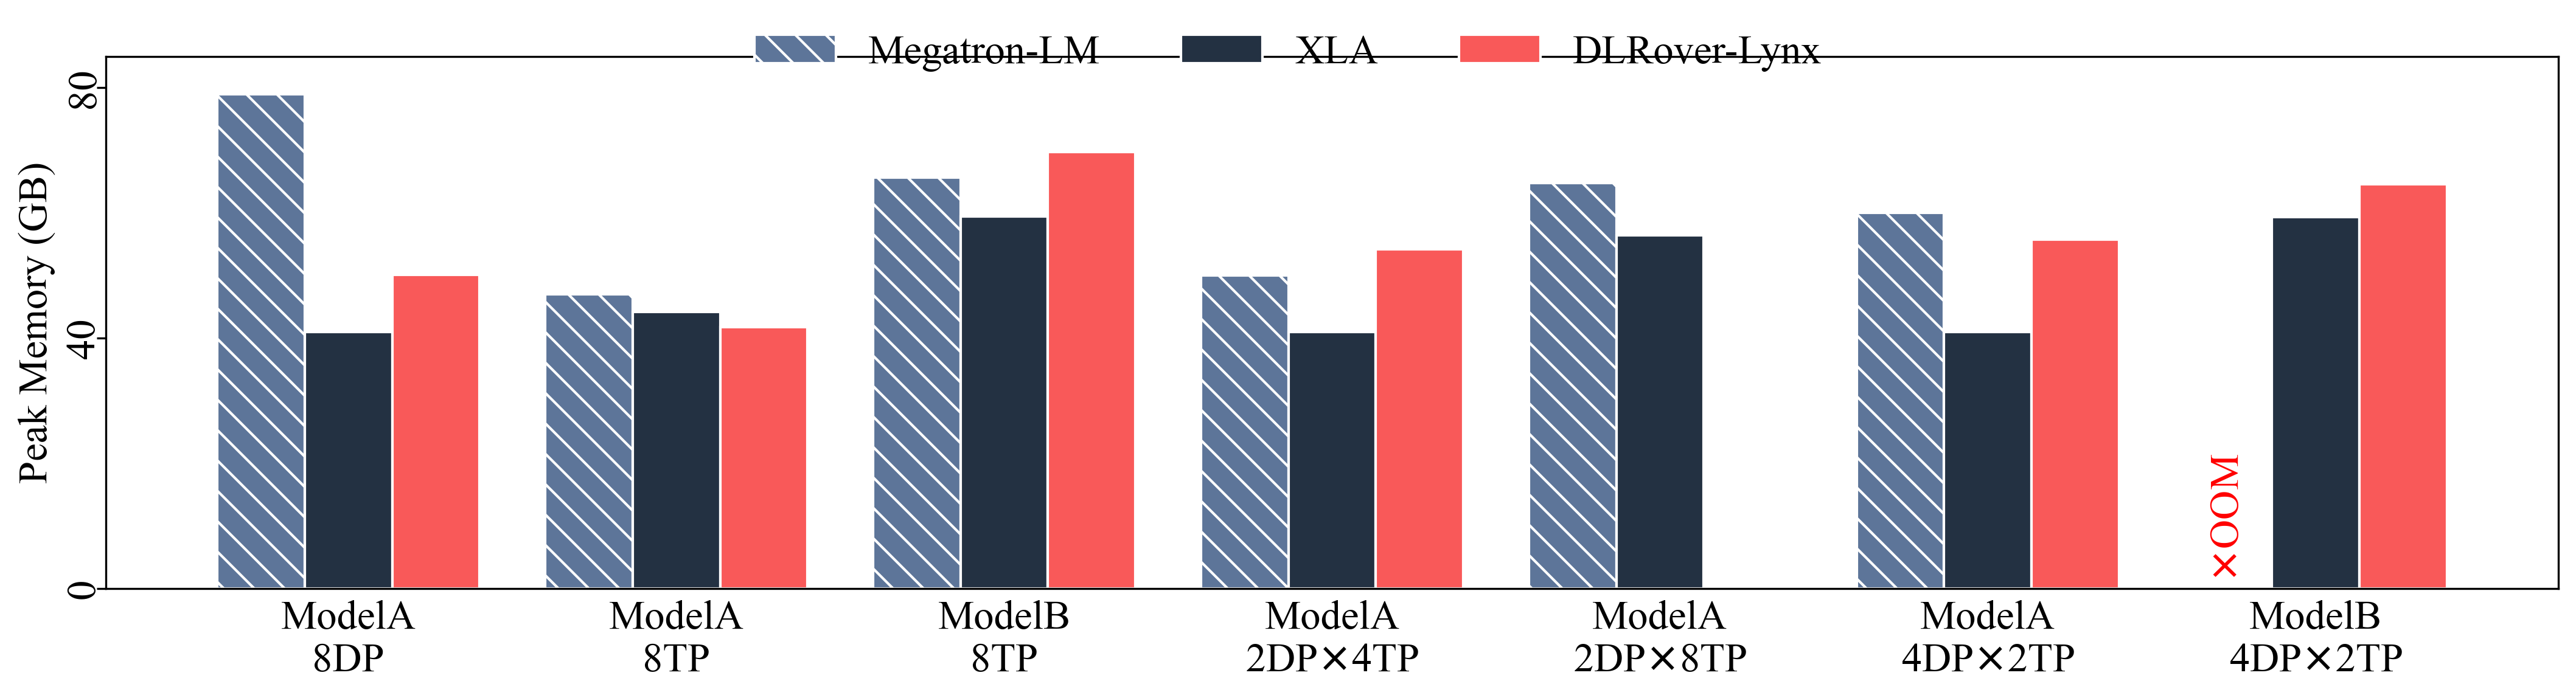

In [9]:
fig.savefig("end_to_end_mem.pdf", bbox_inches="tight", dpi=1000)
fig